In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/customer_churn_.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
#Eda
df.isnull().sum().sum()

np.int64(0)

In [5]:
df.duplicated().sum()

np.int64(0)

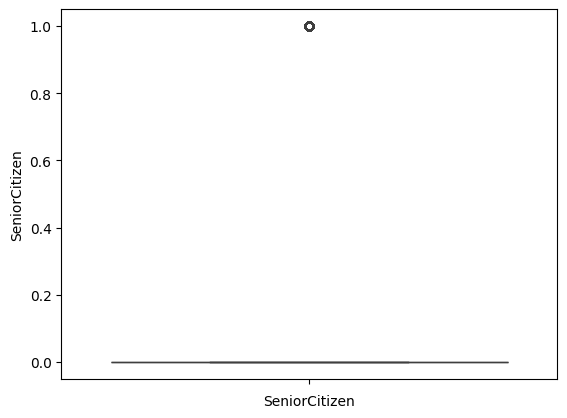

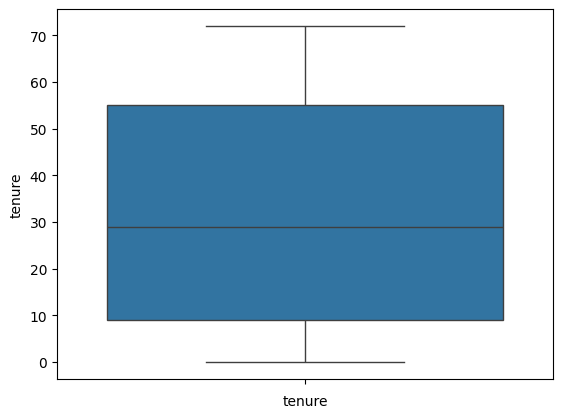

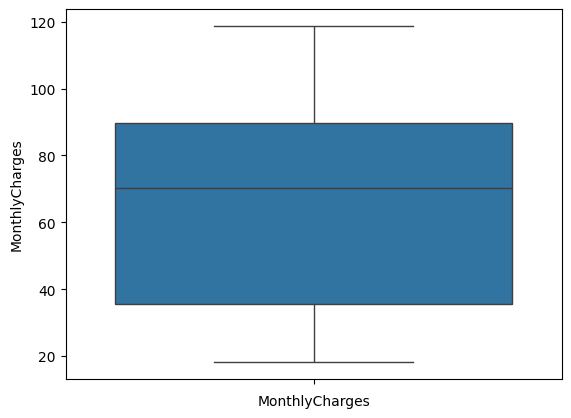

In [6]:
for col in df.columns:
  if (df[col].dtype !='object'):
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [8]:

out_list=[]
for col in out_list:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)

  IQR= Q3-Q1

  LB=Q1-1.5*(IQR)
  UB=Q3+1.5*(IQR)

  df=df[(df[col]>=LB) & (df[col]<=UB)]

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
LE=LabelEncoder()

In [11]:
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=LE.fit_transform(df[col])

In [12]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [20]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
x

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,1525,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,3367,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,5934,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [22]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [ ]:
# VIF - Variation inflation factor

In [23]:
vif_data=pd.DataFrame()

In [24]:
vif_data

""


In [25]:
vif_data['Features']=x.columns

In [26]:
vif_data

,Features
0,customerID
1,gender
2,SeniorCitizen
3,Partner
4,Dependents
5,tenure
6,PhoneService
7,MultipleLines
8,InternetService
9,OnlineSecurity


In [27]:
x.values

array([[5.3750e+03, 0.0000e+00, 0.0000e+00, ..., 2.0000e+00, 2.9850e+01,
        2.5050e+03],
       [3.9620e+03, 1.0000e+00, 0.0000e+00, ..., 3.0000e+00, 5.6950e+01,
        1.4660e+03],
       [2.5640e+03, 1.0000e+00, 0.0000e+00, ..., 3.0000e+00, 5.3850e+01,
        1.5700e+02],
       ...,
       [3.3670e+03, 0.0000e+00, 0.0000e+00, ..., 2.0000e+00, 2.9600e+01,
        2.9940e+03],
       [5.9340e+03, 1.0000e+00, 1.0000e+00, ..., 3.0000e+00, 7.4400e+01,
        2.6600e+03],
       [2.2260e+03, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0565e+02,
        5.4070e+03]])

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values=[]
for i in range(len(x.columns)):
  vif=variance_inflation_factor(x.values,i) #calculating the vif value
  vif_values.append(vif)

vif_data['VIF_Values']=vif_values

In [29]:
vif_data

,Features,VIF_Values
0,customerID,3.556480
1,gender,1.942648
2,SeniorCitizen,1.367362
3,Partner,2.821161
4,Dependents,1.955470
5,tenure,7.488342
6,PhoneService,14.530031
7,MultipleLines,2.755460
8,InternetService,4.331303
9,OnlineSecurity,2.260538


In [ ]:
x.drop('MonthlyCharges',axis=1,inplace=True)

In [36]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   customerID        7043 non-null   int64
 1   gender            7043 non-null   int64
 2   SeniorCitizen     7043 non-null   int64
 3   Partner           7043 non-null   int64
 4   Dependents        7043 non-null   int64
 5   tenure            7043 non-null   int64
 6   PhoneService      7043 non-null   int64
 7   MultipleLines     7043 non-null   int64
 8   InternetService   7043 non-null   int64
 9   OnlineSecurity    7043 non-null   int64
 10  OnlineBackup      7043 non-null   int64
 11  DeviceProtection  7043 non-null   int64
 12  TechSupport       7043 non-null   int64
 13  StreamingTV       7043 non-null   int64
 14  StreamingMovies   7043 non-null   int64
 15  Contract          7043 non-null   int64
 16  PaperlessBilling  7043 non-null   int64
 17  PaymentMethod     7043 non-null  

In [37]:
vif_data=pd.DataFrame()
vif_data['Features']=x.columns

vif_values=[]
for i in range(len(x.columns)):
  vif=variance_inflation_factor(x.values,i) #calculating the vif value
  vif_values.append(vif)

vif_data['VIF_Values']=vif_values

In [38]:
vif_data

,Features,VIF_Values
0,customerID,3.545454
1,gender,1.941694
2,SeniorCitizen,1.344194
3,Partner,2.817082
4,Dependents,1.949670
5,tenure,7.324367
6,PhoneService,9.123719
7,MultipleLines,2.424760
8,InternetService,3.121470
9,OnlineSecurity,2.259831


In [39]:
x.drop('PhoneService',axis=1,inplace=True)

In [40]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   customerID        7043 non-null   int64
 1   gender            7043 non-null   int64
 2   SeniorCitizen     7043 non-null   int64
 3   Partner           7043 non-null   int64
 4   Dependents        7043 non-null   int64
 5   tenure            7043 non-null   int64
 6   MultipleLines     7043 non-null   int64
 7   InternetService   7043 non-null   int64
 8   OnlineSecurity    7043 non-null   int64
 9   OnlineBackup      7043 non-null   int64
 10  DeviceProtection  7043 non-null   int64
 11  TechSupport       7043 non-null   int64
 12  StreamingTV       7043 non-null   int64
 13  StreamingMovies   7043 non-null   int64
 14  Contract          7043 non-null   int64
 15  PaperlessBilling  7043 non-null   int64
 16  PaymentMethod     7043 non-null   int64
 17  TotalCharges      7043 non-null  

In [41]:
vif_data=pd.DataFrame()
vif_data['Features']=x.columns

vif_values=[]
for i in range(len(x.columns)):
  vif=variance_inflation_factor(x.values,i) #calculating the vif value
  vif_values.append(vif)

vif_data['VIF_Values']=vif_values

In [42]:
vif_data

,Features,VIF_Values
0,customerID,3.377663
1,gender,1.914949
2,SeniorCitizen,1.341546
3,Partner,2.807973
4,Dependents,1.947158
5,tenure,7.248547
6,MultipleLines,2.416889
7,InternetService,2.378582
8,OnlineSecurity,2.240368
9,OnlineBackup,2.417365


In [45]:
x.drop('tenure',axis=1,inplace=True)

In [46]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   customerID        7043 non-null   int64
 1   gender            7043 non-null   int64
 2   SeniorCitizen     7043 non-null   int64
 3   Partner           7043 non-null   int64
 4   Dependents        7043 non-null   int64
 5   MultipleLines     7043 non-null   int64
 6   InternetService   7043 non-null   int64
 7   OnlineSecurity    7043 non-null   int64
 8   OnlineBackup      7043 non-null   int64
 9   DeviceProtection  7043 non-null   int64
 10  TechSupport       7043 non-null   int64
 11  StreamingTV       7043 non-null   int64
 12  StreamingMovies   7043 non-null   int64
 13  Contract          7043 non-null   int64
 14  PaperlessBilling  7043 non-null   int64
 15  PaymentMethod     7043 non-null   int64
 16  TotalCharges      7043 non-null   int64
dtypes: int64(17)
memory usage: 935.5 

In [47]:
vif_data=pd.DataFrame()
vif_data['Features']=x.columns

vif_values=[]
for i in range(len(x.columns)):
  vif=variance_inflation_factor(x.values,i) #calculating the vif value
  vif_values.append(vif)

vif_data['VIF_Values']=vif_values

In [48]:
vif_data

,Features,VIF_Values
0,customerID,3.359763
1,gender,1.908547
2,SeniorCitizen,1.332481
3,Partner,2.675120
4,Dependents,1.942118
5,MultipleLines,2.222571
6,InternetService,2.375297
7,OnlineSecurity,2.196660
8,OnlineBackup,2.303042
9,DeviceProtection,2.555918


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75)

In [51]:
x_train.shape

(5282, 17)

In [52]:
x_test.shape

(1761, 17)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
model=LogisticRegression(solver='liblinear',max_iter=1000)

In [61]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [62]:
y_pred=model.predict(x_test)

In [63]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [64]:
y_test

,Churn
5980,0
4316,0
2752,1
6880,0
2006,1
...,...
2102,0
2523,0
1690,0
6495,1


In [65]:
from sklearn.metrics import accuracy_score

In [ ]:
#regression -> r2 score
#classification -> accuracy score

In [66]:
accuracy_score(y_pred,y_test)*100

77.34241908006815

In [ ]:
# PCA, LDA , SMOTE